<a href="https://colab.research.google.com/github/TracyWang0110/Machine-learning-projects/blob/main/cancer_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential 
import sys
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import sklearn 
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
#not limit the display row
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [ ]:
test_data['cancer_type'] =  np.nan
train_data['label'] = 'train'
test_data['label'] ='test'

In [ ]:
df_pre = pd.concat([train_data.assign(ind="train"), test_data.assign(ind="test")],ignore_index=True)
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   radius_0        569 non-null    float64
 1   texture_0       569 non-null    float64
 2   perimeter_0     569 non-null    float64
 3   radius_1        489 non-null    float64
 4   texture_1       569 non-null    float64
 5   perimeter_1     369 non-null    float64
 6   radius_2        569 non-null    float64
 7   texture_2       569 non-null    object 
 8   perimeter_2     569 non-null    float64
 9   age             569 non-null    int64  
 10  treatment_date  569 non-null    object 
 11  diagnose_date   569 non-null    object 
 12  cancer_type     398 non-null    float64
 13  label           569 non-null    object 
 14  ind             569 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 66.8+ KB


In [ ]:
df_pre.groupby('ind').size()

ind
test     171
train    398
dtype: int64

In [ ]:
#check the data type
#change the texture_2 from object to float
#in texture_2, there are some missing values filled with 'xx'
df_pre = df_pre.replace('xx', np.nan)
df_pre['texture_2'] = df_pre['texture_2'].astype(float)
df_pre['treatment_date'] = pd.to_datetime(df_pre['treatment_date'],format = '%Y-%m-%d')
df_pre['diagnose_date'] = pd.to_datetime(df_pre['diagnose_date'], format = '%Y-%m-%d')

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   radius_0        569 non-null    float64       
 1   texture_0       569 non-null    float64       
 2   perimeter_0     569 non-null    float64       
 3   radius_1        489 non-null    float64       
 4   texture_1       569 non-null    float64       
 5   perimeter_1     369 non-null    float64       
 6   radius_2        569 non-null    float64       
 7   texture_2       541 non-null    float64       
 8   perimeter_2     569 non-null    float64       
 9   age             569 non-null    int64         
 10  treatment_date  569 non-null    datetime64[ns]
 11  diagnose_date   569 non-null    datetime64[ns]
 12  cancer_type     398 non-null    float64       
 13  label           569 non-null    object        
 14  ind             569 non-null    object        
dtypes: dat

In [ ]:
#extract time interval information 
df_pre['interval'] = (df_pre['treatment_date'] - df_pre['diagnose_date']).apply(lambda x:x.days)
#extract year information

df_pre['diagnose_year'] = pd.DatetimeIndex(df_pre['diagnose_date']).year

df_pre['treatment_year'] = pd.DatetimeIndex(df_pre['treatment_date']).year

df_pre['treatment_year'] = df_pre['treatment_year'].astype(object)
df_pre['diagnose_year'] = df_pre['diagnose_year'].astype(object)

In [ ]:
df_keep = df_pre

#drop colums
# I am not going to use those 3 variables
cols_drop=['radius_0', 'texture_1','perimeter_2']
left_cols =list(set(df_pre.columns) - set(cols_drop))
df_c = df_pre.loc[:, df_pre.columns.isin(left_cols)]
df_c.head()

,texture_0,perimeter_0,radius_1,perimeter_1,radius_2,texture_2,age,treatment_date,diagnose_date,cancer_type,label,ind,interval,diagnose_year,treatment_year
0,27.204437,136.324256,22.683290,119.523841,21.477052,27.307087,44,2006-06-03,2005-10-23,0.0,train,train,223,2005,2006
1,15.754730,80.916983,14.043753,94.911073,15.012329,17.855131,59,2004-02-22,2007-08-20,1.0,train,train,-1275,2007,2004
2,21.291553,152.281062,23.852166,NaN,28.563252,21.097153,37,2006-01-06,2004-08-07,0.0,train,train,517,2004,2006
3,17.820702,72.178523,11.260258,NaN,12.082749,16.499237,51,2003-04-14,2005-06-16,1.0,train,train,-794,2005,2003
4,17.534187,98.545830,14.380683,89.712492,12.930685,19.856687,21,2004-06-21,2002-11-27,1.0,train,train,572,2002,2004


In [ ]:
df_c.groupby('ind').size()

ind
test     171
train    398
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f482ff51210>,
      dtype=object)

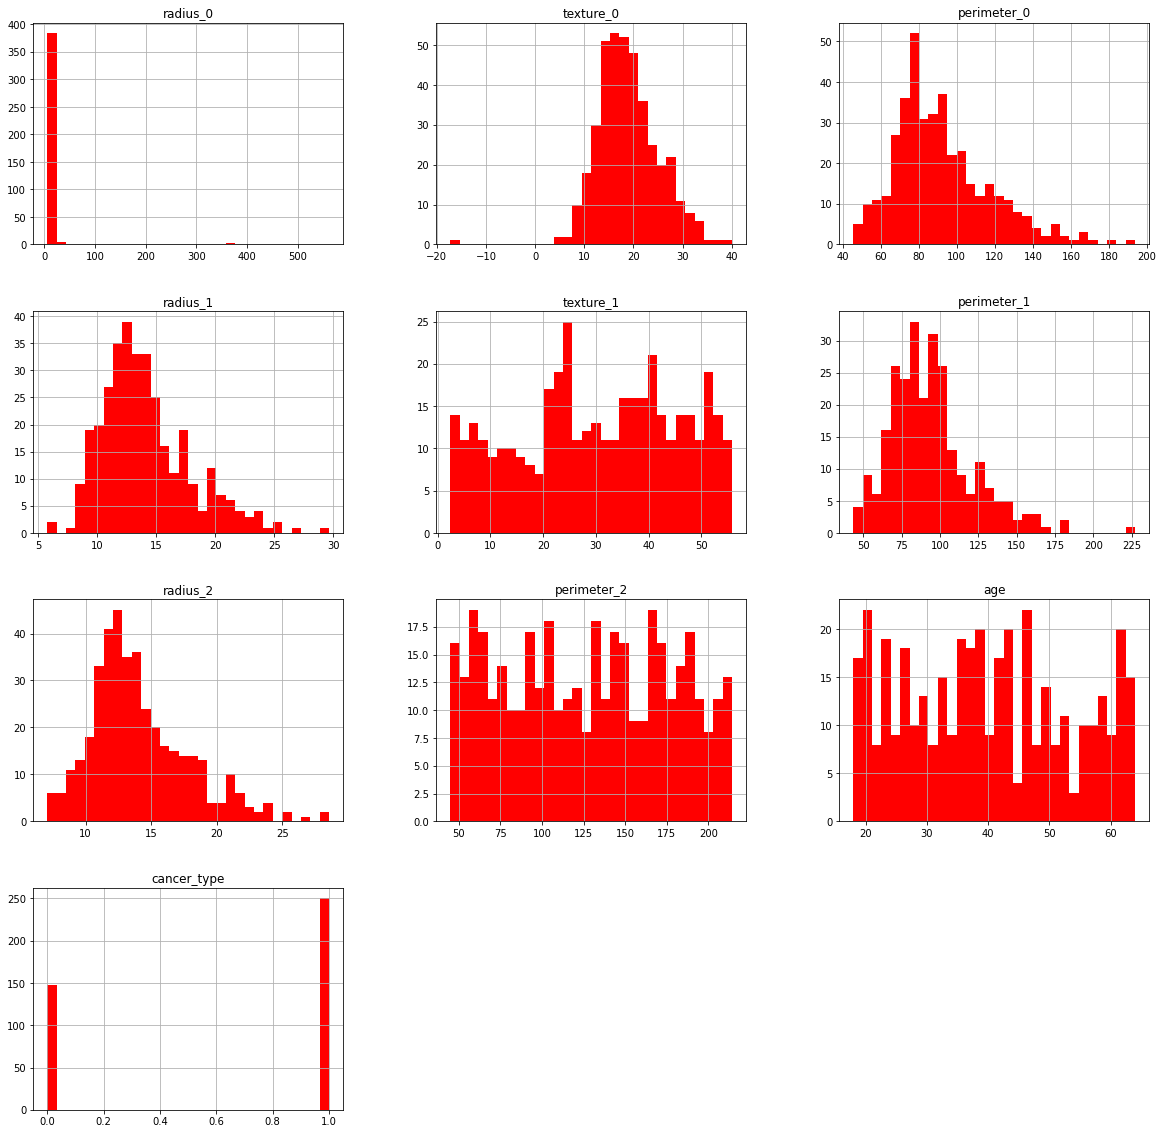

In [ ]:
train_data.hist(bins = 30, figsize = (20,20), color = 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f482f6df690>,
      dtype=object)

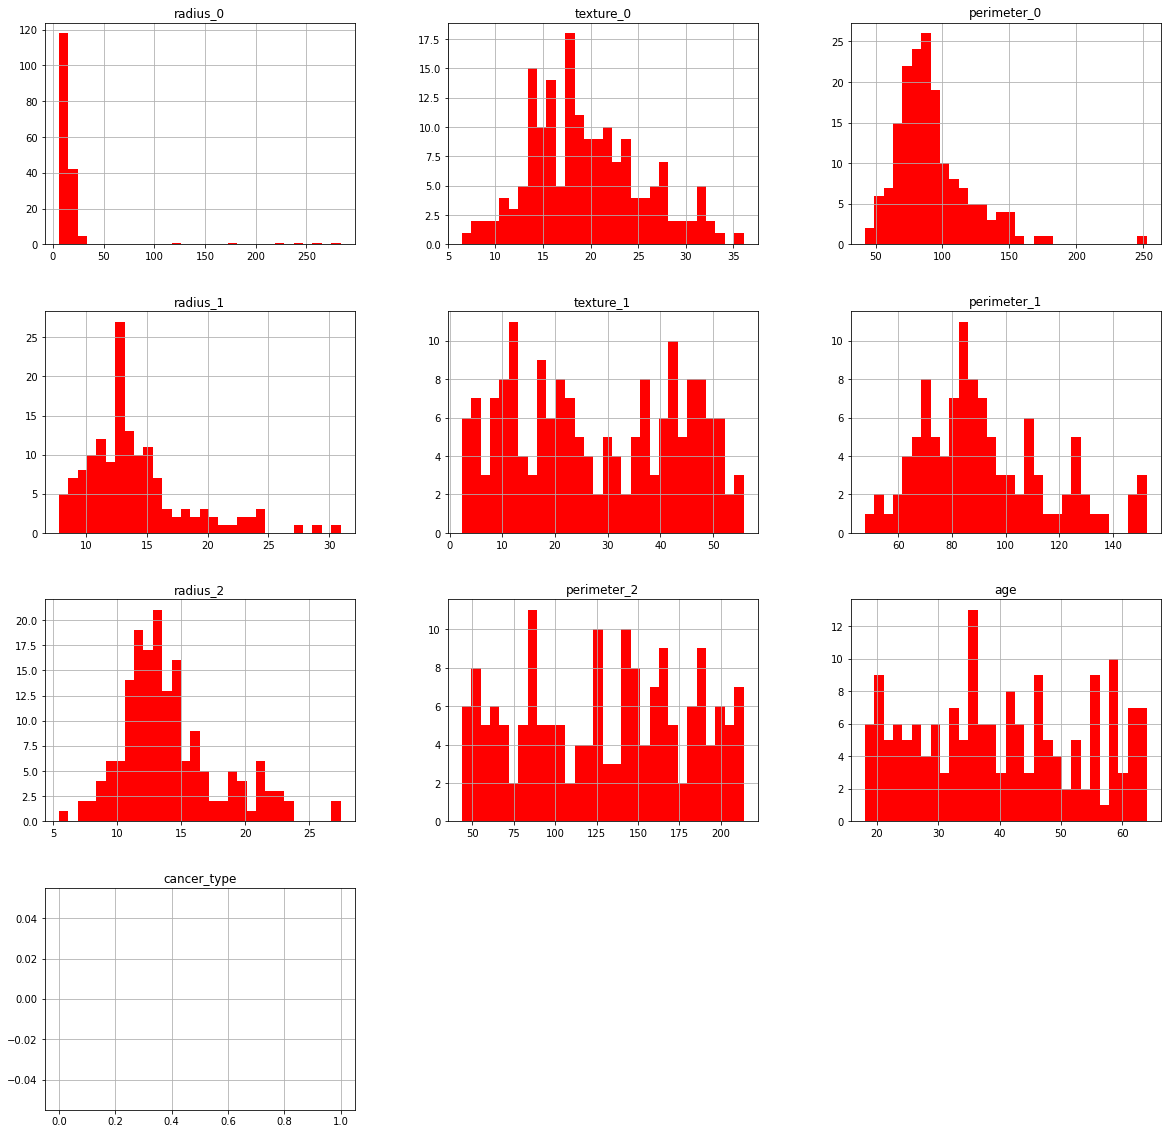

In [ ]:
test_data.hist(bins = 30, figsize = (20,20), color = 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f482f6df650>,
      dtype=object)

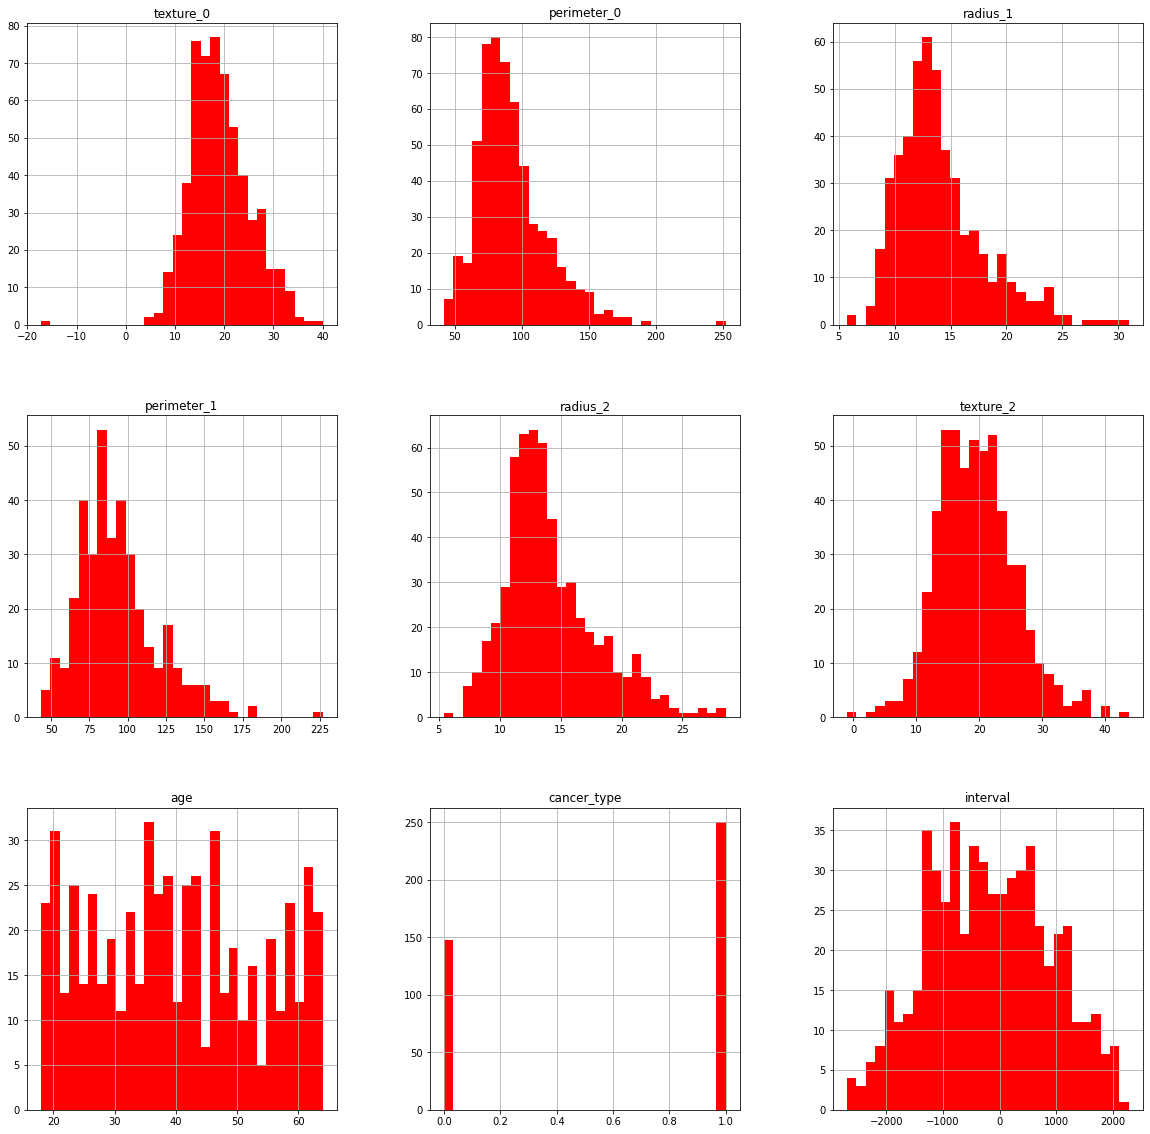

In [ ]:
df_c.hist(bins = 30, figsize = (20,20), color = 'r')

In [ ]:
df_c.describe(include='all')

,texture_0,perimeter_0,radius_1,perimeter_1,radius_2,texture_2,age,treatment_date,diagnose_date,cancer_type,label,ind,interval,diagnose_year,treatment_year
count,569.000000,569.000000,489.000000,369.000000,569.000000,541.000000,569.000000,569,569,398.000000,569,569,569.00000,569.0,569.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513,482,NaN,2,2,NaN,6.0,9.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-04-27 00:00:00,2004-11-04 00:00:00,NaN,train,train,NaN,2004.0,2002.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,398,398,NaN,133.0,78.0
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-09 00:00:00,2002-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-26 00:00:00,2007-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,19.140189,92.143384,14.082352,93.472631,14.120008,19.607541,40.005272,NaN,NaN,0.628141,NaN,NaN,-185.00703,NaN,NaN
std,6.148752,26.115440,3.915918,26.337685,3.782700,6.149969,13.427228,NaN,NaN,0.483909,NaN,NaN,1070.52360,NaN,NaN
min,-17.243202,41.982155,5.752395,43.444930,5.429977,-0.966998,18.000000,NaN,NaN,0.000000,NaN,NaN,-2694.00000,NaN,NaN
25%,14.760752,74.272633,11.542111,74.997856,11.597654,15.286746,28.000000,NaN,NaN,0.000000,NaN,NaN,-1020.00000,NaN,NaN


In [ ]:
df_c['radius_mean'] = df_c[['radius_1', 'radius_2']].mean(axis=1)
df_c['texture_mean'] = df_c[['texture_0', 'radius_2']].mean(axis=1)
df_c['perimeter_mean'] = df_c[['perimeter_0', 'perimeter_1']].mean(axis=1)

In [ ]:
df_c.groupby('ind').size()

ind
test     171
train    398
dtype: int64

In [ ]:
#seperate
test = df_c[df_c['ind'].eq('test')]
train =df_c[df_c['ind'].eq('train')]

In [ ]:
col = ['age','interval','radius_mean','texture_mean', 'perimeter_mean']
X_train= train.loc[:, train.columns.isin(col)]
y_train=train['cancer_type']

In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
train.shape

(398, 18)

In [ ]:
np.all(np.isfinite(X_train))

True

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.feature_importances_

array([0.04872555, 0.05592797, 0.16989601, 0.1162011 , 0.60924937])

<BarContainer object of 5 artists>

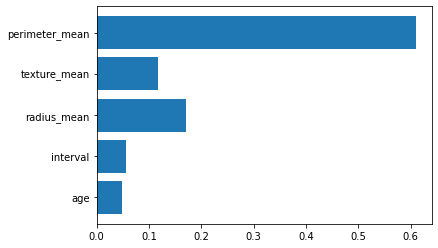

In [ ]:
plt.barh(X_train.columns, rf.feature_importances_)

In [ ]:
df_c.info()
X_cat=df_c[['treatment_year','diagnose_year']]
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   texture_0       569 non-null    float64       
 1   perimeter_0     569 non-null    float64       
 2   radius_1        489 non-null    float64       
 3   perimeter_1     369 non-null    float64       
 4   radius_2        569 non-null    float64       
 5   texture_2       541 non-null    float64       
 6   age             569 non-null    int64         
 7   treatment_date  569 non-null    datetime64[ns]
 8   diagnose_date   569 non-null    datetime64[ns]
 9   cancer_type     398 non-null    float64       
 10  label           569 non-null    object        
 11  ind             569 non-null    object        
 12  interval        569 non-null    int64         
 13  diagnose_year   569 non-null    object        
 14  treatment_year  569 non-null    object        
 15  radius

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(569, 15)

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat.shape
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# note that we dropped the target
X_numerical = df_c[['age','interval','radius_mean','texture_mean', 'perimeter_mean']]
X_numerical

,age,interval,radius_mean,texture_mean,perimeter_mean
0,44,223,22.080171,24.340744,127.924048
1,59,-1275,14.528041,15.383530,87.914028
2,37,517,26.207709,24.927403,152.281062
3,51,-794,11.671504,14.951726,72.178523
4,21,572,13.655684,15.232436,94.129161
5,27,1906,11.691615,17.661193,71.906944
6,51,762,17.419037,19.969847,107.734027
7,40,-723,14.813344,21.507498,79.981098
8,43,-244,13.528482,14.291426,85.100749
9,50,-2175,14.108324,10.505397,92.633498


In [ ]:
X_numerical.shape

(569, 4)

In [ ]:
ind = df_c[['ind']]

In [ ]:
X_all= X_numerical

In [ ]:
pdList = [X_numerical,ind]  # List of your dataframes
X_all_a= pd.concat(pdList, axis=1)
X_all_a.head()

,age,interval,radius_mean,texture_mean,perimeter_mean,ind
0,44,223,22.080171,24.340744,127.924048,train
1,59,-1275,14.528041,15.383530,87.914028,train
2,37,517,26.207709,24.927403,152.281062,train
3,51,-794,11.671504,14.951726,72.178523,train
4,21,572,13.655684,15.232436,94.129161,train


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_A = scaler.fit_transform(X_all)
X_A


array([[0.56521739, 0.58586061, 0.71274025, 0.84915692, 0.40843676],
       [0.89130435, 0.28499699, 0.36783861, 0.58166038, 0.21829011],
       [0.41304348, 0.64490862, 0.90124266, 0.86667677, 0.52419288],
       ...,
       [0.2173913 , 0.4990962 , 0.29395188, 0.58783262, 0.17775984],
       [0.82608696, 0.26651938, 0.69211399, 0.68830705, 0.48057863],
       [0.86956522, 0.07250452, 0.21425359, 0.50617039, 0.1288101 ]])

In [ ]:

X=X_A[0:398,:]

In [ ]:
X.shape

(398, 5)

In [ ]:
y = df_c['cancer_type'].iloc[:398]
y.shape

(398,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
X_train.shape

(318, 5)

In [ ]:
X_test.shape

(80, 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)


In [ ]:
y_pred

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 85.0 %


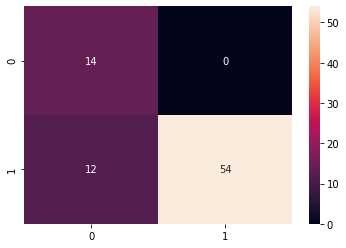

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70        26
         1.0       0.82      1.00      0.90        54

    accuracy                           0.85        80
   macro avg       0.91      0.77      0.80        80
weighted avg       0.88      0.85      0.84        80



In [ ]:
#Define a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.98


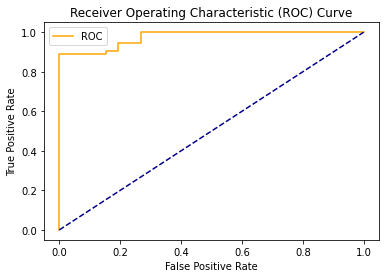

In [ ]:
#predict probabilites for the test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs= model1.predict_proba(X_test)
probs
#keep probabilities of the positive class only
probs = probs[:, 1]
#compute the AUC score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using our defined function
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model2.predict(X_test)

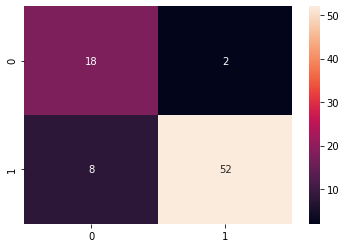

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78        26
         1.0       0.87      0.96      0.91        54

    accuracy                           0.88        80
   macro avg       0.88      0.83      0.85        80
weighted avg       0.88      0.88      0.87        80



AUC: 0.95


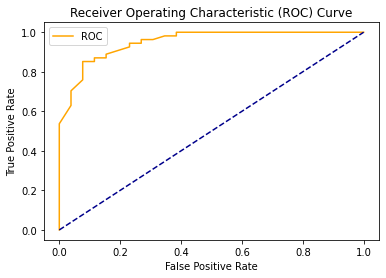

In [ ]:
#predict probabilites for the test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs= model2.predict_proba(X_test)
probs
#keep probabilities of the positive class only
probs = probs[:, 1]
#compute the AUC score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using our defined function
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

In [ ]:
import tensorflow as tf

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(5, )))
model3.add(tf.keras.layers.Dense(units=500, activation='relu'))
model3.add(tf.keras.layers.Dense(units=500, activation='relu'))
model3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               3000      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 501       
Total params: 504,501
Trainable params: 504,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model3.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
7/7 [==============================] - 1s 13ms/step - loss: 0.6569 - accuracy: 0.6289
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5319 - accuracy: 0.7925
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4293 - accuracy: 0.8145
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4393 - accuracy: 0.8270
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.4241 - accuracy: 0.8050
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3849 - accuracy: 0.8491
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3715 - accuracy: 0.8333
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3545 - accuracy: 0.8522
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 0.3367 - accuracy: 0.8553
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3285 - accuracy: 0.8585
Epoch 11/100
7/7 [====

In [ ]:
y_pred = model3.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

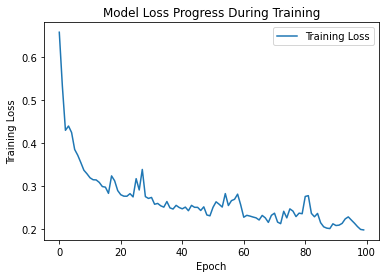

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

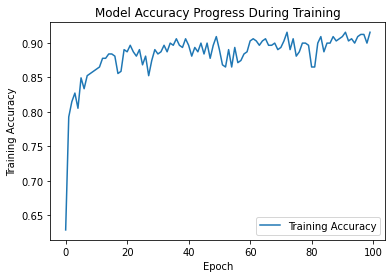

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

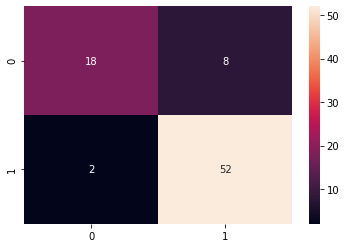

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78        26
         1.0       0.87      0.96      0.91        54

    accuracy                           0.88        80
   macro avg       0.88      0.83      0.85        80
weighted avg       0.88      0.88      0.87        80

